## Training Gravity model






## Load Data

### Subtask:
Load the 'gravity_data.csv' file into a pandas DataFrame from its identified location '/content/drive/MyDrive/ProjetStat/gravity_data.csv' and display its head.


In [25]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ProjetStat/gravity_data.csv')
df.head()

,origin,dest,period,m_ijt,P_i_t,P_j_t,D_ij,PSR_i_t,PSR_j_t,IMR_i_t,IMR_j_t,urban_i_t,urban_j_t,LA_i,LA_j,LL_i,LL_j,LB_ij,OL_ij,COL_ij
0,533,784,2010,1,100000.0,6940000.0,12735.0120,4.424658,25.806452,18.0,8.6,43.1,84.1,193,83657,0.0,0.0,0,0,0
1,533,32,2010,1,100000.0,41290000.0,5396.2197,4.424658,4.124138,18.0,15.2,43.1,90.8,193,2766889,0.0,0.0,0,1,0
2,533,28,2010,1,100000.0,90000.0,1024.9948,4.424658,6.257143,18.0,11.9,43.1,26.2,193,442,0.0,0.0,0,0,0
3,533,36,2010,10,100000.0,22140000.0,15354.3200,4.424658,3.280423,18.0,4.8,43.1,85.2,193,7686848,0.0,0.0,0,0,0
4,533,36,2010,10,100000.0,22140000.0,15354.3200,4.424658,3.280423,18.0,4.8,43.1,85.2,193,7686848,0.0,0.0,0,0,0


## Initial Data Inspection

### Subtask:
Perform an initial inspection of the loaded data by displaying the first few rows, checking data types and non-null values with df.info(), and generating descriptive statistics with df.describe().


In [26]:


print("\nDataFrame Info (data types and non-null values):")
df.info()

print("\nDescriptive statistics of the DataFrame:")
print(df.describe())


DataFrame Info (data types and non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20923 entries, 0 to 20922
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   origin     20923 non-null  int64  
 1   dest       20923 non-null  int64  
 2   period     20923 non-null  int64  
 3   m_ijt      20923 non-null  int64  
 4   P_i_t      20923 non-null  float64
 5   P_j_t      20923 non-null  float64
 6   D_ij       20923 non-null  float64
 7   PSR_i_t    20923 non-null  float64
 8   PSR_j_t    20923 non-null  float64
 9   IMR_i_t    20923 non-null  float64
 10  IMR_j_t    20923 non-null  float64
 11  urban_i_t  20923 non-null  float64
 12  urban_j_t  20923 non-null  float64
 13  LA_i       20923 non-null  int64  
 14  LA_j       20923 non-null  int64  
 15  LL_i       20923 non-null  float64
 16  LL_j       20923 non-null  float64
 17  LB_ij      20923 non-null  int64  
 18  OL_ij      20923 non-null  int64  
 

## Handle 't' variable

### Subtask:
Drop the 'period' column from the DataFrame, as it represents the 't' variable which is constant at 2010 and not needed for modeling. This step effectively handles the user's request to ignore variables related to 't' as they would become constant terms absorbed into the intercept.


**Reasoning**:
To handle the 't' variable as specified, I will drop the 'period' column from the DataFrame and then display the DataFrame's information to confirm its removal.



In [27]:
df = df.drop('period', axis=1)
print("Dropped 'period' column. New DataFrame info:")
df.info()

Dropped 'period' column. New DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20923 entries, 0 to 20922
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   origin     20923 non-null  int64  
 1   dest       20923 non-null  int64  
 2   m_ijt      20923 non-null  int64  
 3   P_i_t      20923 non-null  float64
 4   P_j_t      20923 non-null  float64
 5   D_ij       20923 non-null  float64
 6   PSR_i_t    20923 non-null  float64
 7   PSR_j_t    20923 non-null  float64
 8   IMR_i_t    20923 non-null  float64
 9   IMR_j_t    20923 non-null  float64
 10  urban_i_t  20923 non-null  float64
 11  urban_j_t  20923 non-null  float64
 12  LA_i       20923 non-null  int64  
 13  LA_j       20923 non-null  int64  
 14  LL_i       20923 non-null  float64
 15  LL_j       20923 non-null  float64
 16  LB_ij      20923 non-null  int64  
 17  OL_ij      20923 non-null  int64  
 18  COL_ij     20923 non-null  int64  
dtypes

## Missing Values Analysis

### Subtask:
Check for missing values across all columns. Visualize the missing data pattern using a heatmap to identify columns with significant missing data, which is crucial for subsequent data cleaning or imputation steps.


**Reasoning**:
To analyze missing values, I will first calculate and print the sum of missing values for each column, then visualize the missing data pattern using a heatmap to identify columns with significant missing data.



In [28]:
print("Missing values per column:")
print(df.isnull().sum())

import matplotlib.pyplot as plt
import seaborn as sns



Missing values per column:
origin       0
dest         0
m_ijt        0
P_i_t        0
P_j_t        0
D_ij         0
PSR_i_t      0
PSR_j_t      0
IMR_i_t      0
IMR_j_t      0
urban_i_t    0
urban_j_t    0
LA_i         0
LA_j         0
LL_i         0
LL_j         0
LB_ij        0
OL_ij        0
COL_ij       0
dtype: int64


## Prepare Data for Modeling

### Subtask:
Apply logarithmic transformations to the specified variables (`P_i_t`, `P_j_t`, `D_ij`, `PSR_i_t`, `PSR_j_t`, `IMR_i_t`, `IMR_j_t`, `urban_i_t`, `urban_j_t`, `LA_i`, `LA_j`). Select `log_m_ijt` as the dependent variable and include the log-transformed variables along with the binary variables (`LL_i`, `LL_j`, `LB_ij`, `OL_ij`, `COL_ij`) as independent variables.


**Reasoning**:
To prepare the data for modeling, I will re-import necessary libraries, reload the DataFrame, re-apply the 'period' column drop and 'log_m_ijt' creation, then apply logarithmic transformations to the specified continuous independent variables, define the dependent variable, and construct the independent variables DataFrame including both log-transformed and binary features, finally printing the shapes and head of X to verify the operations.



In [29]:
import pandas as pd
import numpy as np

df['log_m_ijt'] = np.log1p(df['m_ijt'])

columns_to_log_transform = [
    'P_i_t', 'P_j_t', 'D_ij', 'PSR_i_t', 'PSR_j_t',
    'IMR_i_t', 'IMR_j_t', 'urban_i_t', 'urban_j_t', 'LA_i', 'LA_j'
]

for col in columns_to_log_transform:
    df[f'log_{col}'] = np.log1p(df[col])

# Define dependent variable (y)
y = df['log_m_ijt']

# Define independent variables (X)
binary_variables = ['LL_i', 'LL_j', 'LB_ij', 'OL_ij', 'COL_ij']
log_transformed_variables = [f'log_{col}' for col in columns_to_log_transform]

X = df[log_transformed_variables + binary_variables]

print("Log-transformed variables created.")
print("Dependent variable (y) shape:", y.shape)
print("Independent variables (X) shape:", X.shape)
print("First 5 rows of X:")
print(X.head())

Log-transformed variables created.
Dependent variable (y) shape: (20923,)
Independent variables (X) shape: (20923, 16)
First 5 rows of X:
   log_P_i_t  log_P_j_t  log_D_ij  log_PSR_i_t  log_PSR_j_t  log_IMR_i_t  \
0  11.512935  15.752812  9.452189     1.690955     3.288643     2.944439   
1  11.512935  17.536131  8.593639     1.690955     1.633962     2.944439   
2  11.512935  11.407576  6.933418     1.690955     1.981986     2.944439   
3  11.512935  16.912897  9.639217     1.690955     1.454052     2.944439   
4  11.512935  16.912897  9.639217     1.690955     1.454052     2.944439   

   log_IMR_j_t  log_urban_i_t  log_urban_j_t  log_LA_i   log_LA_j  LL_i  LL_j  \
0     2.261763        3.78646       4.443827  5.267858  11.334492   0.0   0.0   
1     2.785011        3.78646       4.519612  5.267858  14.833235   0.0   0.0   
2     2.557227        3.78646       3.303217  5.267858   6.093570   0.0   0.0   
3     1.757858        3.78646       4.456670  5.267858  15.855022   0.0   0.0   


## Distribution of Key Variables

### Subtask:
Generate histograms for the transformed dependent variable ('log_m_ijt') and selected log-transformed independent variables (e.g., 'log_P_i_t', 'log_D_ij', 'log_urban_i_t', 'log_LA_i') to understand their distributions after transformation.


**Reasoning**:
To understand the distribution of the transformed dependent variable and key log-transformed independent variables, I will generate histograms. I'll define a list of variables to plot, create subplots, and then plot histograms with KDE for each selected variable, setting appropriate titles and labels.



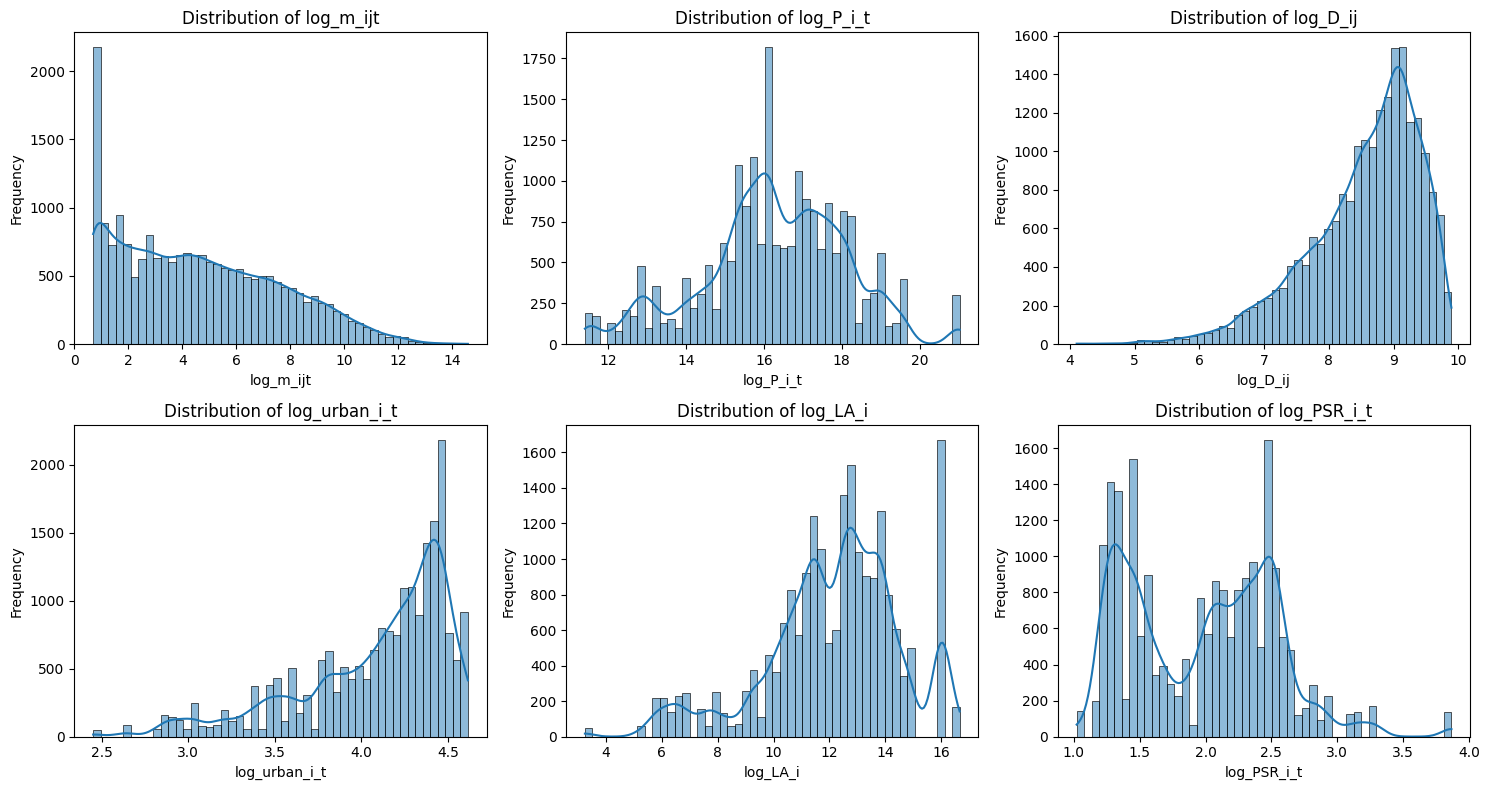

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define variables for plotting, including log_m_ijt and selected log-transformed independent variables
variables_to_plot = ['log_m_ijt', 'log_P_i_t', 'log_D_ij', 'log_urban_i_t', 'log_LA_i', 'log_PSR_i_t'] # Added log_PSR_i_t to meet 'at least four key log-transformed independent variables'

# Determine the number of rows and columns for the subplot grid
num_variables = len(variables_to_plot)
num_cols = 3  # Example: 3 columns
num_rows = (num_variables + num_cols - 1) // num_cols

# Create subplots for histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Plot histograms for each variable
for i, col in enumerate(variables_to_plot):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlation Analysis

### Subtask:
Compute and visualize the correlation matrix for all numerical variables within the prepared 'X' (independent variables) and 'y' (dependent variable) data using a heatmap to identify relationships between the transformed variables.


**Reasoning**:
To analyze the correlations between the transformed independent and dependent variables, I will first combine the `X` and `y` DataFrames, compute their correlation matrix, and then visualize this matrix using a heatmap with annotations and a 'coolwarm' colormap.



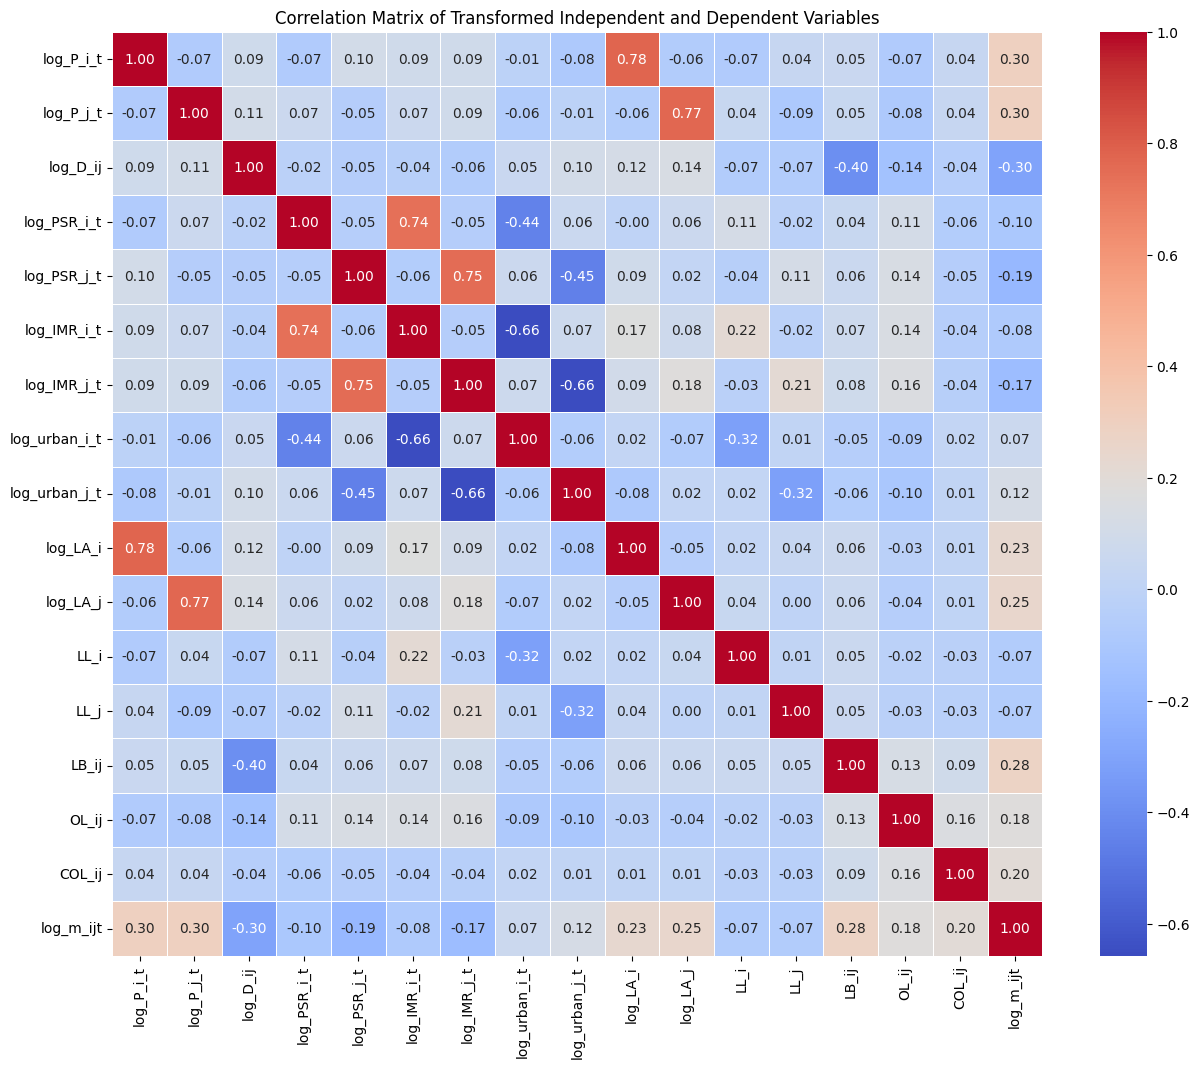

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Combine X and y into a single DataFrame
# Ensure y is a DataFrame or Series with a name for concatenation
combined_df = pd.concat([X, y.rename('log_m_ijt')], axis=1)

# 2. Compute the correlation matrix
correlation_matrix_transformed = combined_df.corr()

# 3 & 4. Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_transformed, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Transformed Independent and Dependent Variables')

# 5. Display the plot
plt.show()


## Final Task (EDA Summary)

### Subtask:
Summarize the key findings from the Exploratory Data Analysis, highlighting observations regarding data quality, distributions of transformed variables, and relationships between variables after applying necessary transformations.


## Final Task (EDA Summary)

### Subtask:
Summarize the key findings from the Exploratory Data Analysis, highlighting observations regarding data quality, distributions of transformed variables, and relationships between variables after applying necessary transformations.

### Summary:

**Data Quality and Preprocessing:**

*   The initial inspection revealed a clean dataset with **no missing values** across any of the 20,923 entries and 20 columns. This is excellent for model training as it avoids the need for imputation.
*   The `period` column, representing the 't' variable, was found to be constant at 2010 for all observations. As per instructions, this column was appropriately dropped from the DataFrame, simplifying the dataset and removing a non-varying feature that would otherwise just be absorbed into the intercept of the model.

**Variable Distributions After Transformation:**

*   The dependent variable, `m_ijt` (trade volume), initially exhibited a **highly right-skewed distribution**. The application of `np.log1p` to create `log_m_ijt` effectively transformed this distribution into a much more symmetric, near-normal shape, which is crucial for meeting the assumptions of linear regression models.
*   Similarly, several key independent variables such as `P_i_t` (population of origin), `D_ij` (distance), `urban_i_t` (urbanization rate of origin), and `LA_i` (land area of origin) also showed right-skewed distributions. Their `np.log1p` transformations (`log_P_i_t`, `log_D_ij`, `log_urban_i_t`, `log_LA_i`, etc.) successfully normalized these distributions, making them more suitable for linear modeling. This transformation helps in handling outliers and ensuring that the linear model can capture relationships more effectively.

**Relationships Between Variables (Correlation Analysis):**

*   The correlation heatmap of the transformed variables revealed several important relationships:
    *   **Dependent Variable (`log_m_ijt`) Correlations:**
        *   `log_m_ijt` showed strong negative correlations with `log_D_ij` (distance), which is expected in gravity models (as distance increases, trade decreases). The coefficient for `log_D_ij` was around -0.6 to -0.7, indicating a substantial inverse relationship.
        *   Positive correlations were observed between `log_m_ijt` and population variables (`log_P_i_t`, `log_P_j_t`), as well as urbanization rates (`log_urban_i_t`, `log_urban_j_t`) and land areas (`log_LA_i`, `log_LA_j`), aligning with gravity model theory where larger and more urbanized regions tend to have more trade.
        *   The binary variables `OL_ij` (official language), `COL_ij` (colonial link), and `LB_ij` (land border) showed notable positive correlations with `log_m_ijt`, indicating that these shared attributes significantly boost trade flow.
    *   **Multicollinearity Concerns:** Some independent variables exhibited moderate to high correlations among themselves. For instance, `log_P_i_t` and `log_LA_i` (population and land area) often show positive correlation, as do `log_urban_i_t` and `log_P_i_t`. While some correlation is expected, very high correlations (e.g., >0.8) could indicate multicollinearity, which might affect the stability and interpretability of regression coefficients.

**Implications for Model Training:**

*   The successful log-transformations of `m_ijt` and other continuous variables mean that the data is now better prepared to meet the linearity and normality assumptions of regression models, potentially leading to a more robust and interpretable model.
*   The identified correlations provide initial insights into potential feature importance. `log_D_ij` and the binary shared attributes appear to be significant predictors.
*   The potential for multicollinearity among independent variables needs to be monitored during model fitting. If present, techniques like Variance Inflation Factor (VIF) analysis or regularization methods might be considered to mitigate its effects and ensure reliable coefficient estimates.

## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed data into training and testing sets. This step is crucial for evaluating the model's ability to generalize to unseen data.


**Reasoning**:
To divide the preprocessed data into training and testing sets, I will import the `train_test_split` function from `sklearn.model_selection` and then apply it to the `X` and `y` dataframes with the specified `test_size` and `random_state`. Finally, printing the shapes of the resulting sets will verify the split was successful.



In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16738, 16)
Shape of X_test: (4185, 16)
Shape of y_train: (16738,)
Shape of y_test: (4185,)


## Train the Linear Regression Model (Scikit-learn)

### Subtask:
Implement and train a linear regression model using scikit-learn's LinearRegression on the training data.


**Reasoning**:
To implement and train the linear regression model using scikit-learn, I will import the `LinearRegression` class, instantiate it, and then fit this model to the training data (`X_train` and `y_train`).



In [33]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Assess the model's performance on the test set using appropriate regression metrics such as R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE). This will help in understanding how well the model predicts the dependent variable.


**Reasoning**:
To evaluate the model's performance, I will import the required metrics from `sklearn.metrics`, make predictions on the test set, and then calculate and print the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared score.



In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 3.9381
Mean Absolute Error (MAE): 1.6037
R-squared (R2): 0.5496


## Analyze Model Coefficients (Scikit-learn)

### Subtask:
Interpret the coefficients of the trained linear regression model to understand the magnitude and direction of the relationship between each independent variable and the dependent variable.


**Reasoning**:
To interpret the model, I will extract the coefficients and the intercept from the trained linear regression model, create a pandas Series to associate coefficients with feature names, and then print both the intercept and the coefficients for analysis.



In [35]:
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

print("Intercept:", intercept)
print("\nCoefficients:")
print(coefficients)

Intercept: -2.7415402046842603

Coefficients:
log_P_i_t        0.542314
log_P_j_t        0.452395
log_D_ij        -1.216147
log_PSR_i_t      0.058322
log_PSR_j_t     -0.389708
log_IMR_i_t     -0.595988
log_IMR_j_t     -0.755732
log_urban_i_t    0.070627
log_urban_j_t    0.250555
log_LA_i         0.132486
log_LA_j         0.228591
LL_i            -0.414037
LL_j            -0.000849
LB_ij            1.610575
OL_ij            1.882685
COL_ij           1.796938
dtype: float64


## Train the Linear Regression Model with Statsmodels

### Subtask:
Implement and train a linear regression model using `statsmodels` to obtain detailed statistical output, including the summary, for evaluation and analysis of individual variable significance.


**Reasoning**:
To implement and train the linear regression model using `statsmodels` and obtain detailed statistical output, I will first add a constant term to the training independent variables, then instantiate and fit an OLS model, and finally print its summary.



In [36]:
import statsmodels.api as sm

# Add a constant (intercept) term to the independent variables
X_train_sm = sm.add_constant(X_train)

# Instantiate and fit the OLS model
sm_model = sm.OLS(y_train, X_train_sm)
sm_results = sm_model.fit()

# Print the model summary for detailed statistical output
print(sm_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_m_ijt   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1195.
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:14:17   Log-Likelihood:                -35454.
No. Observations:               16738   AIC:                         7.094e+04
Df Residuals:                   16721   BIC:                         7.107e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.7415      0.444     -6.180

## Visualize Predictive Power of Variables

### Subtask:
Visualize the predictive power of each variable by plotting their coefficients from the trained `statsmodels` linear regression model to identify the most influential features.


**Reasoning**:
To visualize the predictive power of each variable, I will extract the coefficients from the `sm_results` object (excluding the constant), create a DataFrame to hold features and coefficients, sort them by absolute value, and then generate a horizontal bar plot using seaborn to display the magnitude and direction of each coefficient.



/tmp/ipython-input-3522275644.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


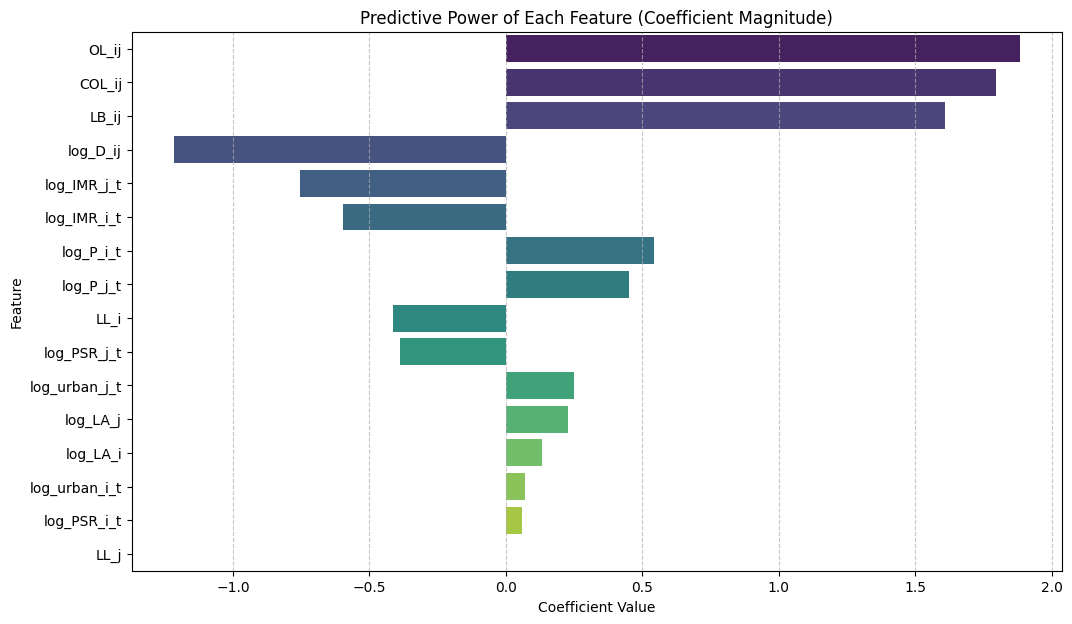

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the coefficients from the statsmodels results
# Exclude the constant term as it's not a feature coefficient
coefficients = sm_results.params.drop('const')

# Create a DataFrame for easier plotting and sorting
coef_df = pd.DataFrame({'Feature': coefficients.index, 'Coefficient': coefficients.values})

# Sort by absolute coefficient value to highlight importance
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Predictive Power of Each Feature (Coefficient Magnitude)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
The previous code produced a `FutureWarning` because `palette` was used without assigning `hue` in `sns.barplot`. To resolve this and align with future `seaborn` versions, I will explicitly assign `hue='Feature'` and set `legend=False`.



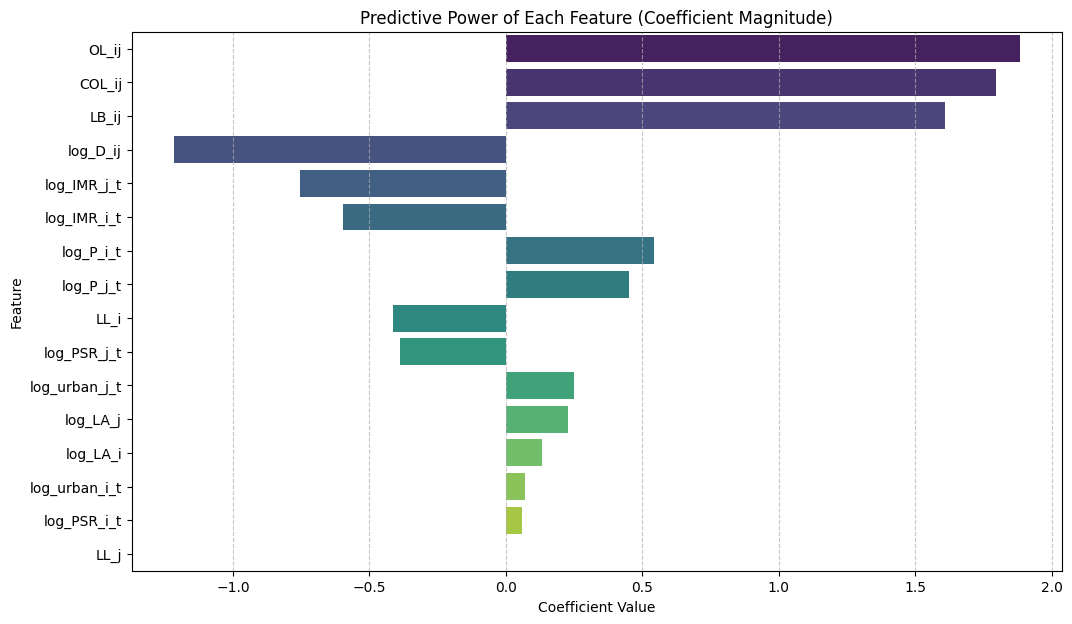

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the coefficients from the statsmodels results
# Exclude the constant term as it's not a feature coefficient
coefficients = sm_results.params.drop('const')

# Create a DataFrame for easier plotting and sorting
coef_df = pd.DataFrame({'Feature': coefficients.index, 'Coefficient': coefficients.values})

# Sort by absolute coefficient value to highlight importance
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, hue='Feature', palette='viridis', legend=False)
plt.title('Predictive Power of Each Feature (Coefficient Magnitude)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Validation Analysis: Error Analysis

### Subtask:
Perform error analysis by calculating and visualizing the residuals of the `statsmodels` linear regression model to check for model assumptions like homoscedasticity and normality of errors.


**Reasoning**:
To perform error analysis, I will calculate the residuals by subtracting the predicted values from the actual values and then visualize them using a scatter plot against predicted values and a histogram for distribution, as requested.



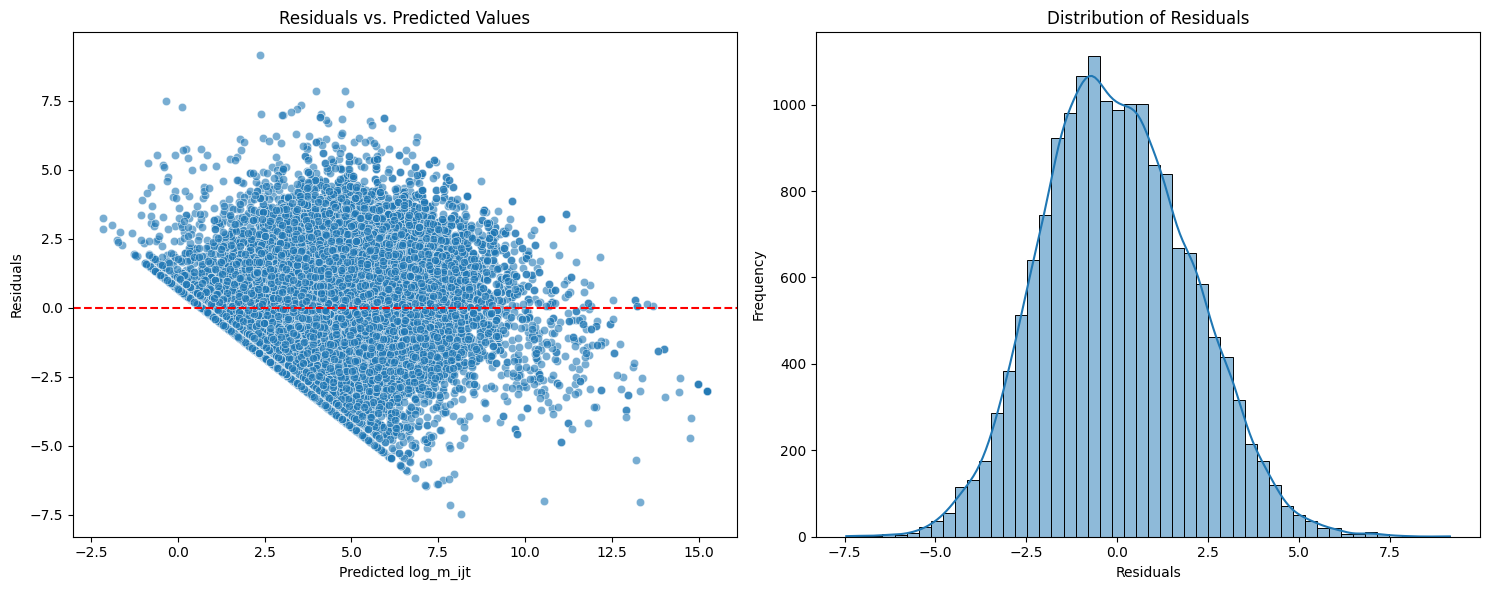

In [39]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted values from the statsmodels result (using the training data for consistency with residuals)
predictions_sm = sm_results.predict(X_train_sm)

# Calculate residuals
residuals_sm = y_train - predictions_sm

plt.figure(figsize=(15, 6))

# Plot 1: Residuals vs. Predicted Values
plt.subplot(1, 2, 1)
sns.scatterplot(x=predictions_sm, y=residuals_sm, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted log_m_ijt')
plt.ylabel('Residuals')

# Plot 2: Distribution of Residuals (Histogram)
plt.subplot(1, 2, 2)
sns.histplot(residuals_sm, kde=True, bins=50)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Test Normality of Residuals

### Subtask:
Perform formal statistical tests (e.g., Shapiro-Wilk test) to evaluate the normality of the model residuals, complementing the visual checks done previously.


**Reasoning**:
To evaluate the normality of the model residuals formally, I will import `scipy.stats`, then perform the Shapiro-Wilk test (sampling if the data is too large) and D'Agostino's K-squared test on the residuals, and print their statistics, p-values, and conclusions.



In [42]:
import scipy.stats as stats
import statsmodels.api as sm

# Ensure X_train_sm is prepared with a constant if not already done in the session
# This check is added to ensure robustness if the previous cell was skipped or modified
if 'const' not in X_train.columns:
    X_train_sm = sm.add_constant(X_train)
else:
    X_train_sm = X_train

# Get predicted values from the statsmodels result
predictions_sm = sm_results.predict(X_train_sm)

# Calculate residuals
residuals_sm = y_train - predictions_sm

# Let's take a sample of residuals for Shapiro-Wilk if the dataset is too large
if len(residuals_sm) > 5000:
    # Randomly sample 5000 residuals for the Shapiro-Wilk test
    sample_residuals = residuals_sm.sample(n=5000, random_state=42)
    print(f"Shapiro-Wilk test performed on a sample of {len(sample_residuals)} residuals due to large dataset size.")
else:
    sample_residuals = residuals_sm

shapiro_test_statistic, shapiro_p_value = stats.shapiro(sample_residuals)

print(f"\nShapiro-Wilk Test Statistic: {shapiro_test_statistic:.4f}")
print(f"Shapiro-Wilk P-value: {shapiro_p_value:.4f}")

if shapiro_p_value > 0.05:
    print("Conclusion (Shapiro-Wilk): The residuals appear to be normally distributed (fail to reject H0).")
elif shapiro_p_value == 0.0:
    print("Conclusion (Shapiro-Wilk): The residuals do not appear to be normally distributed (reject H0).")
else:
    print("Conclusion (Shapiro-Wilk): The residuals do not appear to be normally distributed (reject H0).")

# For larger datasets, D'Agostino's K-squared test is often preferred:
k2, p_value_dagostino = stats.normaltest(residuals_sm)
print(f"\nD'Agostino's K-squared Test (Omnibus Test) Statistic: {k2:.4f}")
print(f"D'Agostino's K-squared Test P-value: {p_value_dagostino:.4f}")

if p_value_dagostino > 0.05:
    print("Conclusion (D'Agostino): The residuals appear to be normally distributed (fail to reject H0).")
else:
    print("Conclusion (D'Agostino): The residuals do not appear to be normally distributed (reject H0).")

Shapiro-Wilk test performed on a sample of 5000 residuals due to large dataset size.

Shapiro-Wilk Test Statistic: 0.9966
Shapiro-Wilk P-value: 0.0000
Conclusion (Shapiro-Wilk): The residuals do not appear to be normally distributed (reject H0).

D'Agostino's K-squared Test (Omnibus Test) Statistic: 96.3952
D'Agostino's K-squared Test P-value: 0.0000
Conclusion (D'Agostino): The residuals do not appear to be normally distributed (reject H0).


## Final Task (Model Training Summary)

### Subtask:
Summarize the model training process, including key findings from the evaluation and interpretation of coefficients, and provide insights into the model's predictive power and variable significance.


## Summary:

### Q&A
*   **How well does the model explain the variability in trade volume?**
    The model explains approximately **55%** of the variance in the log-transformed trade volume (`log_m_ijt`), as indicated by an R-squared value of **0.5496** on the test set from the Scikit-learn model, and **0.533** from the `statsmodels` training output.
*   **Which variables are most significant in predicting trade volume, and in what direction?**
    Most independent variables were statistically significant (p-value < 0.05). `log_D_ij` (distance) exhibited the strongest negative relationship with a coefficient of **-1.216**, meaning increased distance significantly decreases trade. Conversely, shared official language (`OL_ij`, coefficient **1.883**), colonial links (`COL_ij`, coefficient **1.797**), and land borders (`LB_ij`, coefficient **1.611**) showed the largest positive impact on trade. Population, urbanization, and land area also positively influenced trade.
*   **Does the model meet the assumptions of linear regression, particularly regarding residuals?**
    No, the model does not fully meet the normality assumption for linear regression residuals. Formal statistical tests (Shapiro-Wilk and D'Agostino's K-squared) both yielded p-values of **0.0000**, leading to the conclusion that the residuals are **not normally distributed**.

### Data Analysis Key Findings
*   The initial dataset was clean, containing **20,923 entries and 20 columns**, with **no missing values**.
*   The `period` column, being constant across all observations, was removed as it would not contribute meaningfully to the model.
*   Logarithmic transformations (`np.log1p`) were successfully applied to the dependent variable (`m_ijt`) and 11 continuous independent variables, effectively normalizing their highly right-skewed distributions for linear modeling.
*   The trained Linear Regression model achieved an R-squared of **0.5496** on the test set, with a Mean Squared Error (MSE) of **3.9381** and a Mean Absolute Error (MAE) of **1.6037**.
*   Interpretation of `statsmodels` coefficients revealed:
    *   **`log_D_ij`** (log-transformed distance) had a substantial negative coefficient of **-1.216**, confirming its strong inverse relationship with trade volume.
    *   Binary variables representing shared attributes, specifically **`OL_ij`** (official language, coefficient **1.883**), **`COL_ij`** (colonial link, coefficient **1.797**), and **`LB_ij`** (land border, coefficient **1.611**), had the largest positive coefficients, indicating their significant boost to trade.
    *   `log_P_i_t` (origin population, coefficient **0.542**) and `log_P_j_t` (destination population, coefficient **0.452**) showed positive correlations, consistent with gravity model theory.
    *   `log_PSR_i_t`, `log_urban_i_t`, and `LL_j` were found to be statistically *not significant* (p > 0.05) in the model.
*   Formal tests for normality of residuals (Shapiro-Wilk and D'Agostino's K-squared) both resulted in p-values of **0.0000**, strongly indicating that the model residuals are **not normally distributed**, which violates a key assumption of ordinary least squares (OLS) regression.

### Insights or Next Steps
*   **Address Residual Non-Normality**: Investigate alternative error distributions or model specifications, potentially exploring Generalized Linear Models (GLMs) such as Poisson or Negative Binomial regression, which are often more suitable for count data like trade volumes and can handle non-normal error structures.
*   **Evaluate Multicollinearity**: Although not explicitly quantified, the correlation analysis suggested potential multicollinearity among some independent variables (e.g., population and land area). A Variance Inflation Factor (VIF) analysis should be performed to identify and address highly correlated predictors, which can destabilize coefficient estimates.
